In [ ]:
!pip3 install scipy
import scipy
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('dataframe.csv')
data.head()
data2 = data.dropna()
#print(data2.head())
print(data2.shape)
data2.drop("file_name", axis=1, inplace=True)
data2.drop("py_script", axis=1, inplace=True)
data2.head()

(2000, 9)


,Unnamed: 0,user_name,repo_name,comment,comment_len,comment_den,line_count
0,0,00,wikihouse,2,44,0.017241,116
1,1,0rpc,zerorpc-python,24,1244,0.066116,363
2,2,0xadada,dockdj,1,21,0.076923,13
3,3,1stvamp,hippybot,0,0,0.000000,34
4,4,2buntu,2buntu-blog,1,21,0.090909,11


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


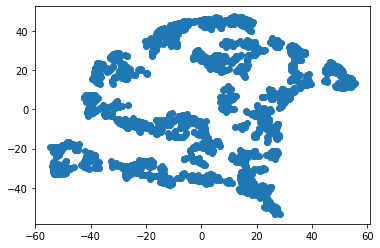

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import make_column_transformer
vect = TfidfVectorizer()
ct = make_column_transformer((vect,'user_name'),(vect,'repo_name'),remainder='passthrough')
X = ct.fit_transform(data2)
projection = TSNE().fit_transform(X)
plt.scatter(*projection.T)

     |████████████████████████████████| 5.2 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330835 sha256=9da90e9d3efa5246bc44794602668afda640eb93cafa61798165b2ad1d8866e5
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan
2000
110000


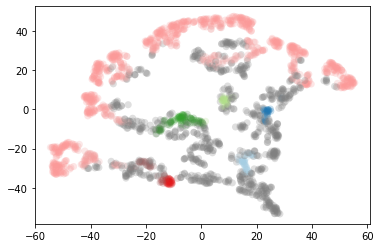

In [ ]:
!pip install hdbscan
from sklearn.cluster import DBSCAN
import numpy as np
import hdbscan
#clustering = DBSCAN(eps=3, min_samples=2)
#clustering.fit_predict(X)


clusterer = hdbscan.HDBSCAN(min_samples=10,min_cluster_size=20, prediction_data=True).fit(X.toarray())
print(len(clusterer.labels_))


color_palette = sns.color_palette('Paired', 110000)
print(len(color_palette))

cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

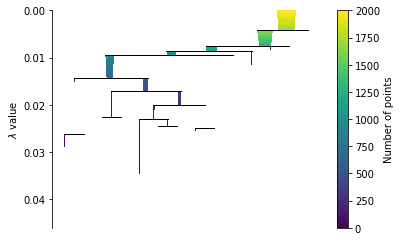

In [ ]:
clusterer.condensed_tree_
clusterer.condensed_tree_.plot()


In [ ]:
from sklearn import cluster
print(clusterer.labels_)
print(len(clusterer.labels_))
uniqueLabels = []
for lab in clusterer.labels_:
  if lab not in uniqueLabels:
    uniqueLabels.append(lab)

print(len(uniqueLabels))
print("Unique labels : ",uniqueLabels)
data2['labels'] = clusterer.labels_
data2.head()
data2.to_csv('output_clustering.csv')

[ 4 -1  4 ... -1  4  4]
2000
7
[4, -1, 5, 3, 0, 2, 1]


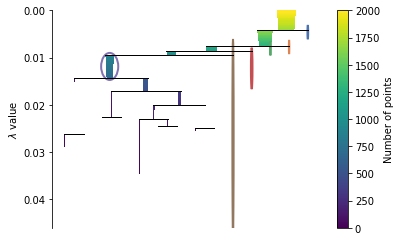

In [ ]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))